In [1]:
# import all required modules
import spacy
import nltk
from nltk import word_tokenize, pos_tag, RegexpParser
from nltk.tokenize import TreebankWordTokenizer
import re

from IPython.display import display
from nltk.tree import Tree
nltk.download('punkt') 
nltk.download('averaged_perceptron_tagger') 


# spacy for dependency extraction
nlp = spacy.load("en_core_web_sm")


[nltk_data] Error loading punkt: <urlopen error [Errno -2] Name or
[nltk_data]     service not known>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [Errno -2] Name or service not known>


In [2]:
txt = """
1. The average person squanders about forty days a year compensating for things he or she has forgotten.

2. It was simply a matter of learning to “think in more memorable ways” using the “extraordinarily simple” 2,500-year-old mnemonic technique known as the “memory palace” that Simonides of Ceos had supposedly invented in the rubble of the great banquet hall collapse.

3. A trained memory was not just a handy tool, but a fundamental facet of any worldly mind.

4. What we have been doing over the last century is defining memory incorrectly, understanding it incompletely, applying it inappropriately, and condemning it because it doesn’t work and isn’t enjoyable.

5. In a sense, the elaborate system of externalized memory we’ve created is a way of fending off mortality.
"""

In [3]:
# remove empty lines and get only the sentences
sentences = [x for x in txt.strip().split("\n") if len(x)>0]

In [4]:
print(f"Sentences lenght is  {len(sentences)}")

Sentences lenght is  5


In [5]:
print(sentences)

['1. The average person squanders about forty days a year compensating for things he or she has forgotten.', '2. It was simply a matter of learning to “think in more memorable ways” using the “extraordinarily simple” 2,500-year-old mnemonic technique known as the “memory palace” that Simonides of Ceos had supposedly invented in the rubble of the great banquet hall collapse.', '3. A trained memory was not just a handy tool, but a fundamental facet of any worldly mind.', '4. What we have been doing over the last century is defining memory incorrectly, understanding it incompletely, applying it inappropriately, and condemning it because it doesn’t work and isn’t enjoyable.', '5. In a sense, the elaborate system of externalized memory we’ve created is a way of fending off mortality.']


In [6]:
# we need to remove the numbering.
# from the observation, it is the fisrt letter and then dot.
#We use list slicing to get only items from index two each sentence
sentences = [text[2:].strip() for text in sentences]

In [7]:
print(sentences)

['The average person squanders about forty days a year compensating for things he or she has forgotten.', 'It was simply a matter of learning to “think in more memorable ways” using the “extraordinarily simple” 2,500-year-old mnemonic technique known as the “memory palace” that Simonides of Ceos had supposedly invented in the rubble of the great banquet hall collapse.', 'A trained memory was not just a handy tool, but a fundamental facet of any worldly mind.', 'What we have been doing over the last century is defining memory incorrectly, understanding it incompletely, applying it inappropriately, and condemning it because it doesn’t work and isn’t enjoyable.', 'In a sense, the elaborate system of externalized memory we’ve created is a way of fending off mortality.']


### Preprocessing.
- Create a function to remove non characters, punctuations, lowercasing the sentences etc.

In [8]:
def preporocess(sent):
    sent = sent.lower()
    #all pucntuations are removed
    sent = re.sub(r"[^a-zA-Z0-9]", " ", sent)
    #multiple spaces
    sent = sent.replace("  ", " ")
    
    return sent


In [9]:
preporocess(sentences[0])

'the average person squanders about forty days a year compensating for things he or she has forgotten '

### Parts of Speech tagging.
- Cleaned text column is going to be used for this part of POS tagging
- Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag).
- POS tagging essential to preserve the context of the word

In [10]:
# create POS tagger for verb , adjective , noun , adverb etc
from nltk.corpus import wordnet
def token_stop_pos(text):
    """
    @params -- text --- a text to be tagged using pos
    Tags a word to its corrected POS 
    
    returns  a list of tuple containing the word and its POS
    """
    word_tags = nltk.pos_tag(word_tokenize(text))
    return word_tags

In [11]:
# iterate through each sentence while extracting these tags
# while iterating, the sentence willl be processed using the function above

for sent in sentences:
    processed_sent = preporocess(sent)
    print(f"Sentence  {processed_sent} POS are:\n")
    display(*token_stop_pos(processed_sent))
    print("\n")

Sentence  the average person squanders about forty days a year compensating for things he or she has forgotten  POS are:



('the', 'DT')

('average', 'JJ')

('person', 'NN')

('squanders', 'NNS')

('about', 'IN')

('forty', 'JJ')

('days', 'NNS')

('a', 'DT')

('year', 'NN')

('compensating', 'VBG')

('for', 'IN')

('things', 'NNS')

('he', 'PRP')

('or', 'CC')

('she', 'PRP')

('has', 'VBZ')

('forgotten', 'VBN')



Sentence  it was simply a matter of learning to think in more memorable ways using the extraordinarily simple 2 500 year old mnemonic technique known as the memory palace that simonides of ceos had supposedly invented in the rubble of the great banquet hall collapse  POS are:



('it', 'PRP')

('was', 'VBD')

('simply', 'RB')

('a', 'DT')

('matter', 'NN')

('of', 'IN')

('learning', 'VBG')

('to', 'TO')

('think', 'VB')

('in', 'IN')

('more', 'RBR')

('memorable', 'JJ')

('ways', 'NNS')

('using', 'VBG')

('the', 'DT')

('extraordinarily', 'RB')

('simple', 'JJ')

('2', 'CD')

('500', 'CD')

('year', 'NN')

('old', 'JJ')

('mnemonic', 'JJ')

('technique', 'NN')

('known', 'VBN')

('as', 'IN')

('the', 'DT')

('memory', 'NN')

('palace', 'NN')

('that', 'WDT')

('simonides', 'VBZ')

('of', 'IN')

('ceos', 'NN')

('had', 'VBD')

('supposedly', 'RB')

('invented', 'VBN')

('in', 'IN')

('the', 'DT')

('rubble', 'NN')

('of', 'IN')

('the', 'DT')

('great', 'JJ')

('banquet', 'NN')

('hall', 'NN')

('collapse', 'NN')



Sentence  a trained memory was not just a handy tool but a fundamental facet of any worldly mind  POS are:



('a', 'DT')

('trained', 'JJ')

('memory', 'NN')

('was', 'VBD')

('not', 'RB')

('just', 'RB')

('a', 'DT')

('handy', 'JJ')

('tool', 'NN')

('but', 'CC')

('a', 'DT')

('fundamental', 'JJ')

('facet', 'NN')

('of', 'IN')

('any', 'DT')

('worldly', 'RB')

('mind', 'NN')



Sentence  what we have been doing over the last century is defining memory incorrectly understanding it incompletely applying it inappropriately and condemning it because it doesn t work and isn t enjoyable  POS are:



('what', 'WP')

('we', 'PRP')

('have', 'VBP')

('been', 'VBN')

('doing', 'VBG')

('over', 'IN')

('the', 'DT')

('last', 'JJ')

('century', 'NN')

('is', 'VBZ')

('defining', 'VBG')

('memory', 'NN')

('incorrectly', 'RB')

('understanding', 'VBG')

('it', 'PRP')

('incompletely', 'RB')

('applying', 'VBG')

('it', 'PRP')

('inappropriately', 'RB')

('and', 'CC')

('condemning', 'VBG')

('it', 'PRP')

('because', 'IN')

('it', 'PRP')

('doesn', 'VBZ')

('t', 'JJ')

('work', 'NN')

('and', 'CC')

('isn', 'JJ')

('t', 'NN')

('enjoyable', 'JJ')



Sentence  in a sense the elaborate system of externalized memory we ve created is a way of fending off mortality  POS are:



('in', 'IN')

('a', 'DT')

('sense', 'NN')

('the', 'DT')

('elaborate', 'JJ')

('system', 'NN')

('of', 'IN')

('externalized', 'JJ')

('memory', 'NN')

('we', 'PRP')

('ve', 'VBP')

('created', 'VBN')

('is', 'VBZ')

('a', 'DT')

('way', 'NN')

('of', 'IN')

('fending', 'VBG')

('off', 'RP')

('mortality', 'NN')

### Dependency and Consistency parsing
- Here, Nltk and Spacy will be used for this purpose


- First lets draw these pos against the words in order to visualize them well

In [12]:
# to visualize pos tags
def visualize_pos_tags(text):
    """
    Visualize a word agaist some selected words
    """
    selected_tags = ["PRON", "VERB", "NOUN", "ADJ", "ADP","ADV", "CONJ", "DET", "NUM", "PRT"]
    #get token from the text to check
    txt_tokens = word_tokenize(text)
    #get tags
    txt_tags = nltk.pos_tag(txt_tokens, tagset ="universal")

    # start and end of tokens generators
    txt_span_generator = TreebankWordTokenizer().span_tokenize(text)
    txt_spans = [x for x in txt_span_generator]

    # a dict with start, end indexs and pos tag for each
    ents = []
    for tag, span in zip(txt_tags, txt_spans):
        #only the selected tags
        if tag[1] in selected_tags:
            ents.append({"start" : span[0], "end" : span[1], "label" : tag[1] })
    #txt vs the results
    doc = {"text" : text, "ents" : ents}
    colors = {
        "PRON": "blueviolet","VERB": "lightpink","NOUN": "turquoise", "ADV" : "orange","CONJ" : "cornflowerblue",
        "DET" : "forestgreen","NUM" : "salmon","ADJ" : "lime","ADP" : "khaki","PRT" : "yellow"
    }
    
    spacy.displacy.render(doc,style = "ent", options = {"ents" : selected_tags, "colors": colors}, manual = True,)

In [13]:
# iterate though all sentences while plotting the above resuls

for sentence in sentences:
    #process
    sentence = preporocess(sentence)
    #visualize
    print(f"Sentence:  {sentence}\n")
    visualize_pos_tags(sentence)
    print("\n\n")

Sentence:  the average person squanders about forty days a year compensating for things he or she has forgotten 






Sentence:  it was simply a matter of learning to think in more memorable ways using the extraordinarily simple 2 500 year old mnemonic technique known as the memory palace that simonides of ceos had supposedly invented in the rubble of the great banquet hall collapse 






Sentence:  a trained memory was not just a handy tool but a fundamental facet of any worldly mind 






Sentence:  what we have been doing over the last century is defining memory incorrectly understanding it incompletely applying it inappropriately and condemning it because it doesn t work and isn t enjoyable 






Sentence:  in a sense the elaborate system of externalized memory we ve created is a way of fending off mortality 



- Create a regex object to extract the pos tags for consisituency parsing

In [14]:
# regex to extract pos tags from the sentence
regex_matcher = RegexpParser(""" 
                       NP: {<DT>?<JJ>*<NN>}
                       P: {<IN>} 
                       V: {<V.*>} 
                       PP: {<P> <NP>}
                       VP: {<V> <NP|PP>*}
                       """) 


Sentence :   The average person squanders about forty days a year compensating for things he or she has forgotten.   ***Constituency Parsing***


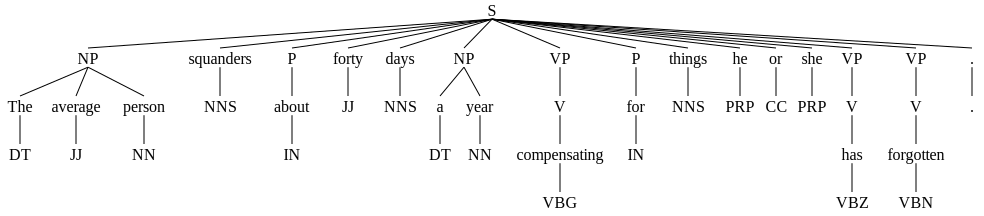




Sentence :   It was simply a matter of learning to “think in more memorable ways” using the “extraordinarily simple” 2,500-year-old mnemonic technique known as the “memory palace” that Simonides of Ceos had supposedly invented in the rubble of the great banquet hall collapse.   ***Constituency Parsing***


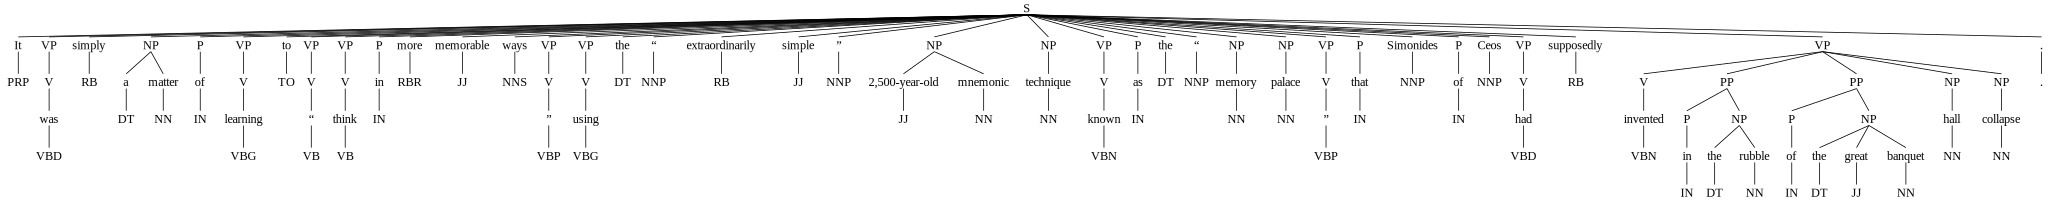




Sentence :   A trained memory was not just a handy tool, but a fundamental facet of any worldly mind.   ***Constituency Parsing***


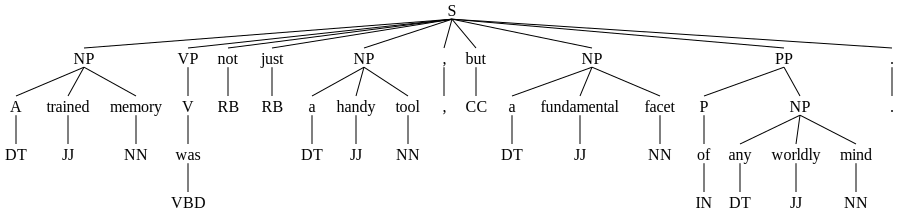




Sentence :   What we have been doing over the last century is defining memory incorrectly, understanding it incompletely, applying it inappropriately, and condemning it because it doesn’t work and isn’t enjoyable.   ***Constituency Parsing***


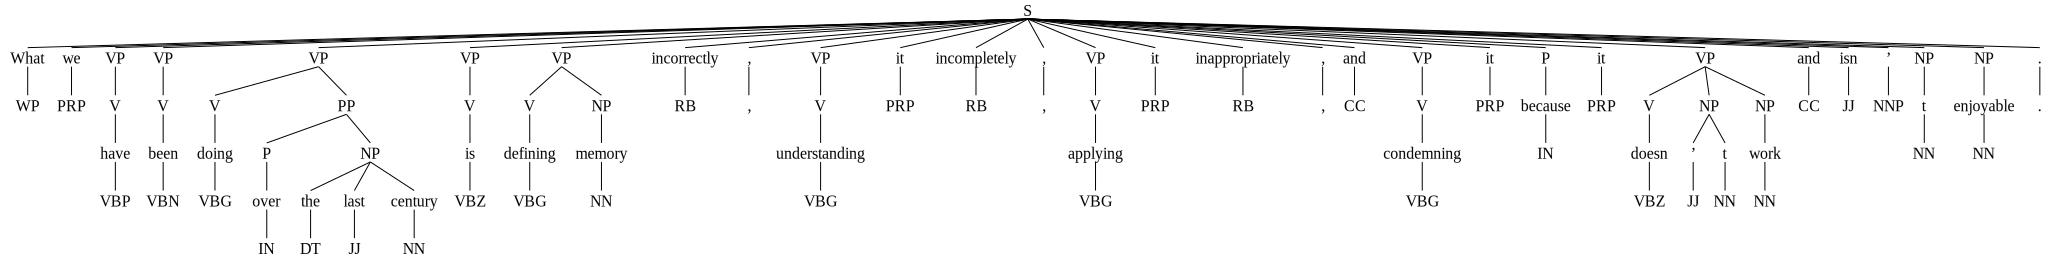




Sentence :   In a sense, the elaborate system of externalized memory we’ve created is a way of fending off mortality.   ***Constituency Parsing***


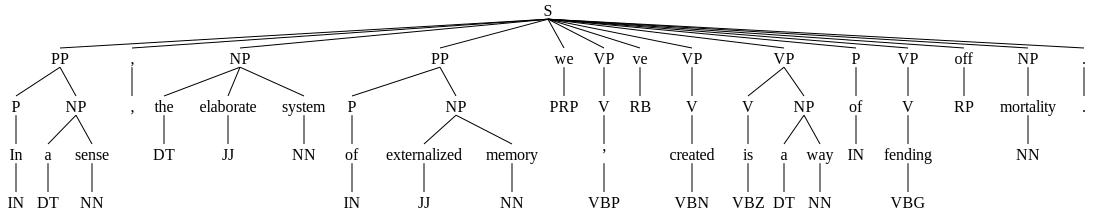

In [15]:
# move throug each sentence, process and extact the information need for consistuency matching
for sentense in sentences:
    sentence = preporocess(sentense)
    #extract pos and parse them through the above regex to extract consisituency 
    #extract Consistengy
    res = regex_matcher.parse(pos_tag(word_tokenize(sentense))) 
    print(f"Sentence :   {sentense}   ***Constituency Parsing***")
    display(res)
    print("\n\n")


- Do the same as above for dependecy matching.

In [16]:
# move throug each sentence, process and extact the information need for dependency matching
for sentense in sentences:
    sentence = preporocess(sentense)
    #parse the sentence through a spacy model to get the model object with all information
    document_obj = nlp(sentence)
    print(f"Sentence :   {sentense}   ***Dependency Parsing***")
    #render this dependency
    spacy.displacy.render(document_obj, style = "dep", jupyter=True)
    print("\n\n")


Sentence :   The average person squanders about forty days a year compensating for things he or she has forgotten.   ***Dependency Parsing***





Sentence :   It was simply a matter of learning to “think in more memorable ways” using the “extraordinarily simple” 2,500-year-old mnemonic technique known as the “memory palace” that Simonides of Ceos had supposedly invented in the rubble of the great banquet hall collapse.   ***Dependency Parsing***





Sentence :   A trained memory was not just a handy tool, but a fundamental facet of any worldly mind.   ***Dependency Parsing***





Sentence :   What we have been doing over the last century is defining memory incorrectly, understanding it incompletely, applying it inappropriately, and condemning it because it doesn’t work and isn’t enjoyable.   ***Dependency Parsing***





Sentence :   In a sense, the elaborate system of externalized memory we’ve created is a way of fending off mortality.   ***Dependency Parsing***
